In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ito_diffusions import *
plt.style.use('dark_background')

In [2]:
params = {
    'font.size': 14,
    'figure.figsize': (11,18),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

In [3]:
T = 1
SCHEME_STEPS = int(1e4)

## Brownian motion, with and without drift

$dX_t = \mu dt + \sigma dW_t$

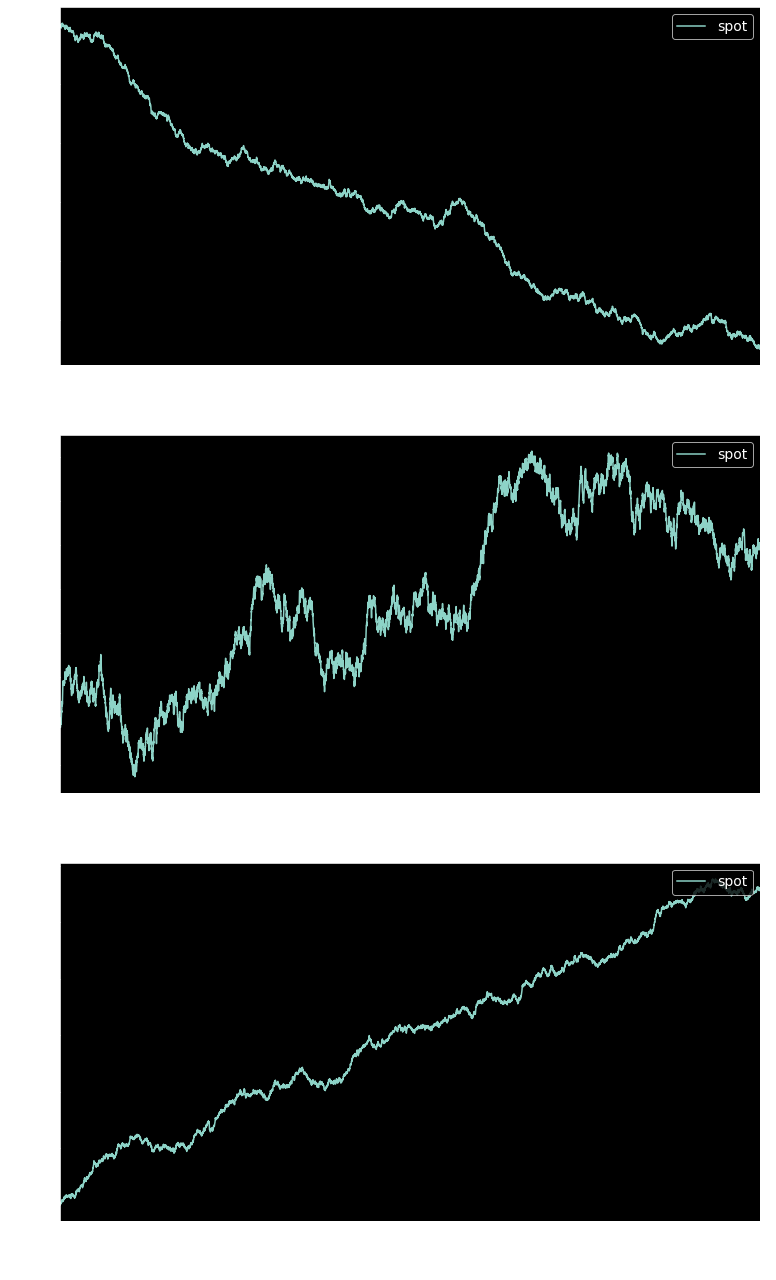

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=1)

drifts = [-5.0, 0.0, 5.0]

X = BM(x0=0, T=T, scheme_steps=SCHEME_STEPS, vol=1)

for i, ax in enumerate(axes):
    drift = drifts[i]
    X.drift_double = drift
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\ndrift={:.2}'.format(drift))
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    
plt.tight_layout()
plt.show()

## Brownian motion, with absorption at zero

$dX_t = \mu dt + \sigma dW_t$

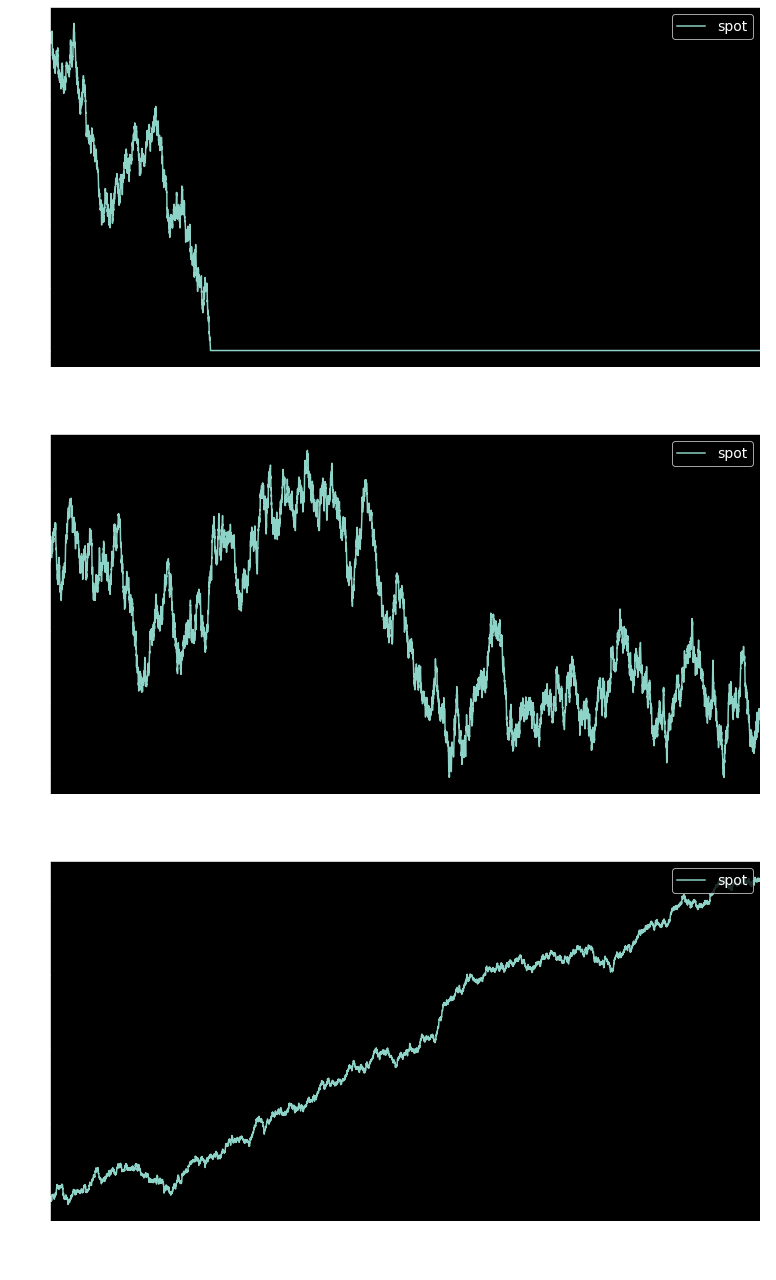

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=1)

drifts = [-5.0, 0.0, 5.0]

X = BM(x0=1, T=T, scheme_steps=SCHEME_STEPS, vol=1,\
          barrier=0, barrier_condition='absorb')
    
for i, ax in enumerate(axes):
    drift = drifts[i]
    X.drift_double = drift
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\ndrift={:.2}'.format(drift))
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    
plt.tight_layout()
plt.show()

## Geometric Brownian motion, with and without drift

$dX_t = \mu X_t dt + \sigma X_t dW_t$

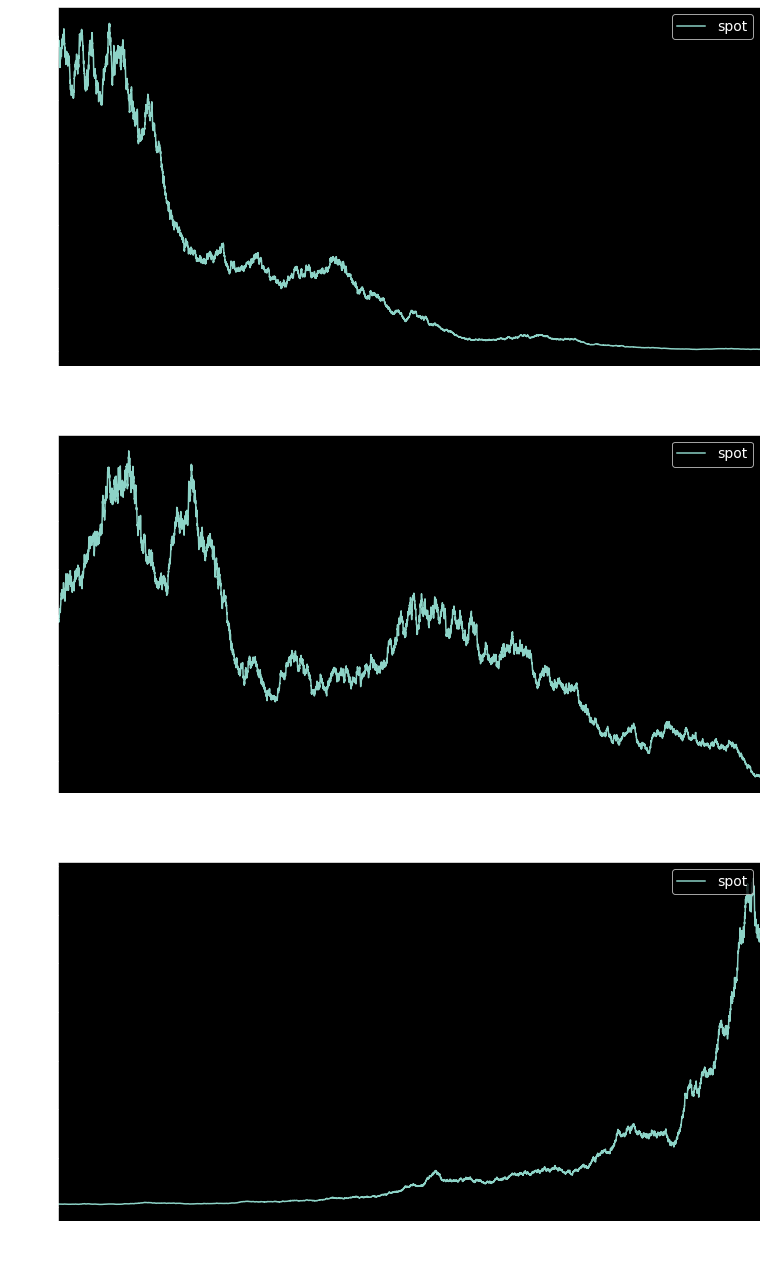

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1)

drifts = [-5.0, 0.0, 5.0]

X = GBM(x0=1, T=T, scheme_steps=SCHEME_STEPS, vol=1)

for i, ax in enumerate(axes):
    drift = drifts[i]
    X.drift_double = drift
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\ndrift={:.2}'.format(drift))
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    
plt.tight_layout()
plt.show()

## Pseudo Geometric Brownian motion
With increasing volatility

$dX_t = \mu dt + \sigma X_t dW_t$

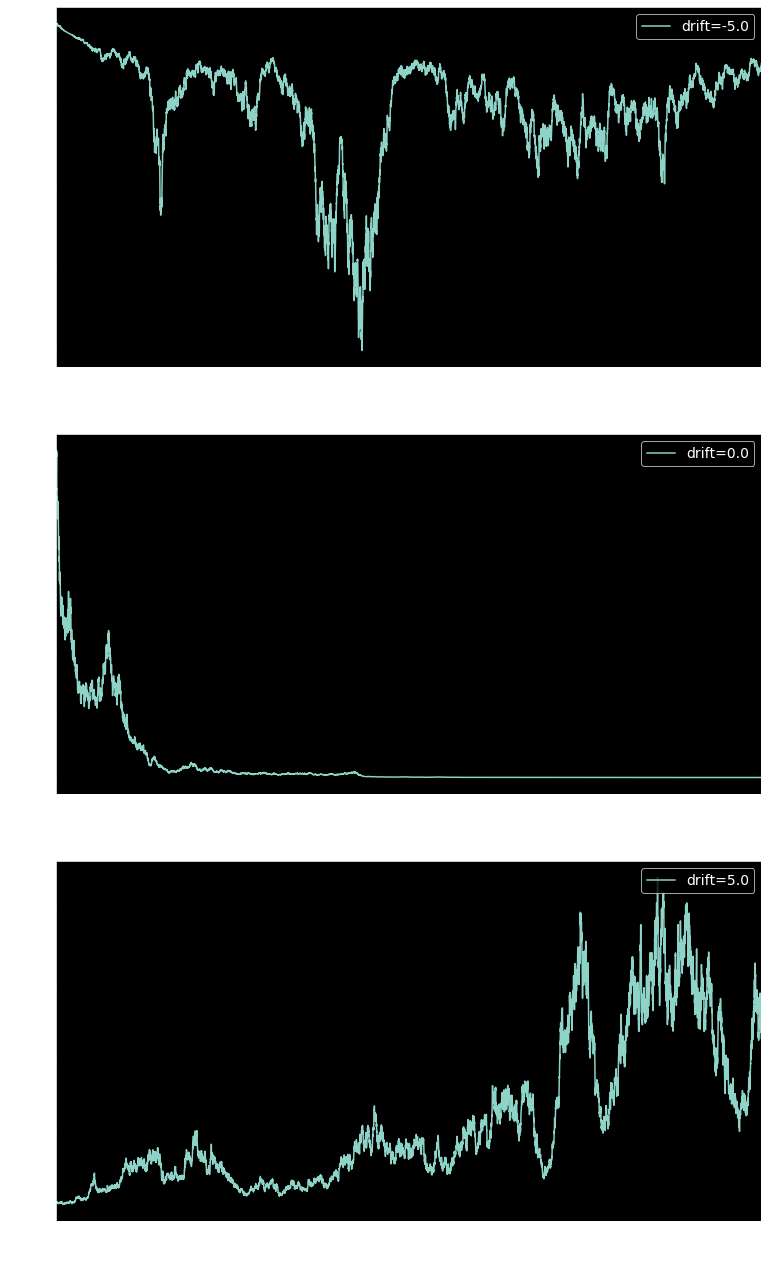

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=1)

drifts = [-5.0, 0.0, 5.0]

X = pseudo_GBM(x0=1, T=10, scheme_steps=SCHEME_STEPS, drift=0, vol=1)
    
for i, ax in enumerate(axes):
    drift = drifts[i]
    X.drift_double = drift
    df = X.simulate()
    df.columns = ['drift={}'.format(drift)]
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\n')
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')   

plt.tight_layout()
plt.show()

## Bessel process

$dX_t = \frac{d-1}{2X_t}dt + \sigma dW_t$

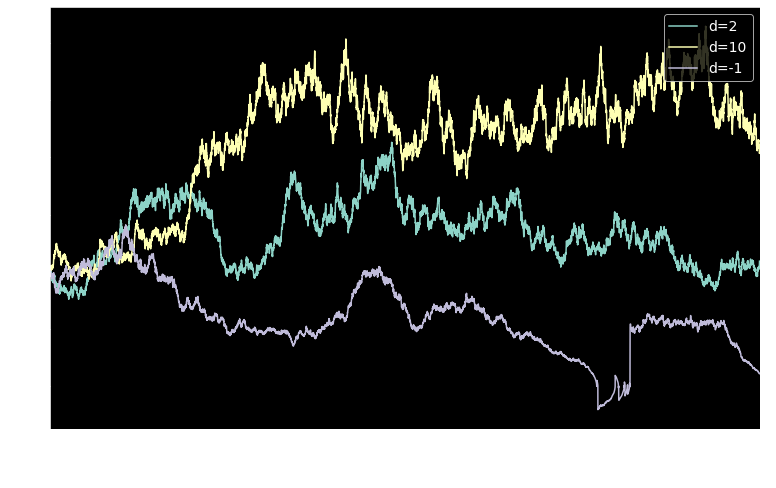

In [8]:
fig, ax = plt.subplots(figsize=(11, 7), nrows=1, ncols=1)

ds = [2, 10, -1]

X = Bessel(x0=1.0, T=1, scheme_steps=SCHEME_STEPS, vol=1.0)

for d in ds:
    X.d = d
    df = X.simulate()
    df.columns = ['d={}'.format(d)]
    df.plot(kind='line', ax=ax)

ax.set_xlabel('time\n')
ax.set_ylabel('spot')
ax.legend(loc='upper right')
    
plt.tight_layout()
plt.show()

## Brownian motion with periodic drift and vol

$dX_t = A_{\text{drift}} \sin(\omega_{\text{drift}}t + \phi_{\text{drift}}) dt +  A_{\text{vol}} \sin(\omega_{\text{vol}}t + \phi_{\text{vol}}) dW_t$

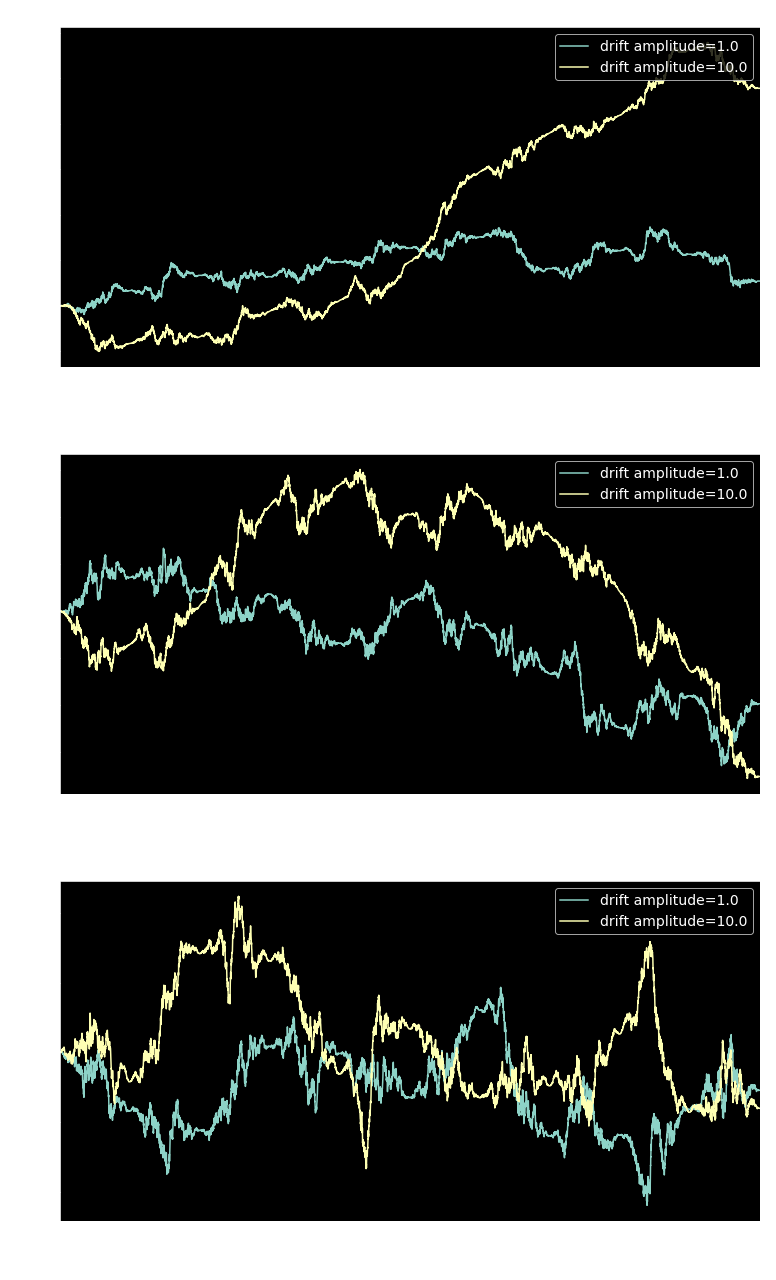

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=1)

drift_amp_sets = [
    [1.0, 10.0],
    [1.0, 10.0],
    [1.0, 10.0],
]

drift_freqs = [
    0.5,
    1.0,
    50.0,
]

X = BMPeriodic(x0=1.0, 
               T=T, 
               scheme_steps=SCHEME_STEPS, 
               vol_amp=2.0,
               vol_freq=5.0,
               vol_phase=0.0,
              )

for i, ax in enumerate(axes):
    drift_amps = drift_amp_sets[i]
    drift_freq = drift_freqs[i]
    for drift_amp in drift_amps:
        X.drift_amp = drift_amp
        X.drift_freq = drift_freq
        df = X.simulate()
        df.columns = ['drift amplitude={}'.format(drift_amp)]
        df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\n')
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    ax.set_title('drift frequency={}'.format(drift_freq))
    
plt.tight_layout()
plt.show()

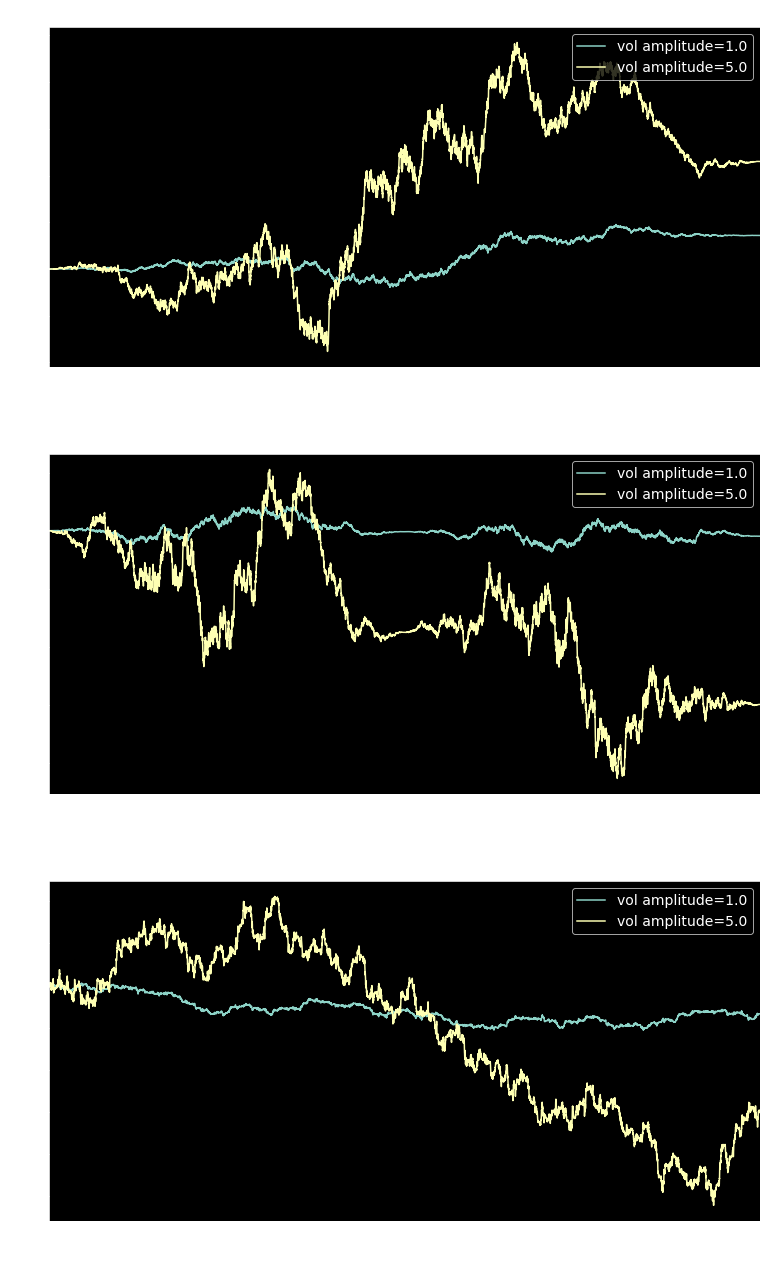

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=1)

vol_amp_sets = [
    [1.0, 5.0],
    [1.0, 5.0],
    [1.0, 5.0],
]

vol_freqs = [
    0.5,
    1.0,
    50.0,
]

X = BMPeriodic(x0=0.0, 
               T=T, 
               scheme_steps=SCHEME_STEPS, 
               drift_amp=0.0,
               drift_freq=1.0,
               drift_phase=0.0,
              )

for i, ax in enumerate(axes):
    vol_amps = vol_amp_sets[i]
    vol_freq = vol_freqs[i]
    for vol_amp in vol_amps:
        X.vol_amp = vol_amp
        X.vol_freq = vol_freq
        df = X.simulate()
        df.columns = ['vol amplitude={}'.format(vol_amp)]
        df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\n')
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    ax.set_title('vol frequency={}'.format(vol_freq))
    
plt.tight_layout()
plt.show()

## Vasicek model

$dX_t = \lambda (\theta - X_t)dt + \sigma dW_t$

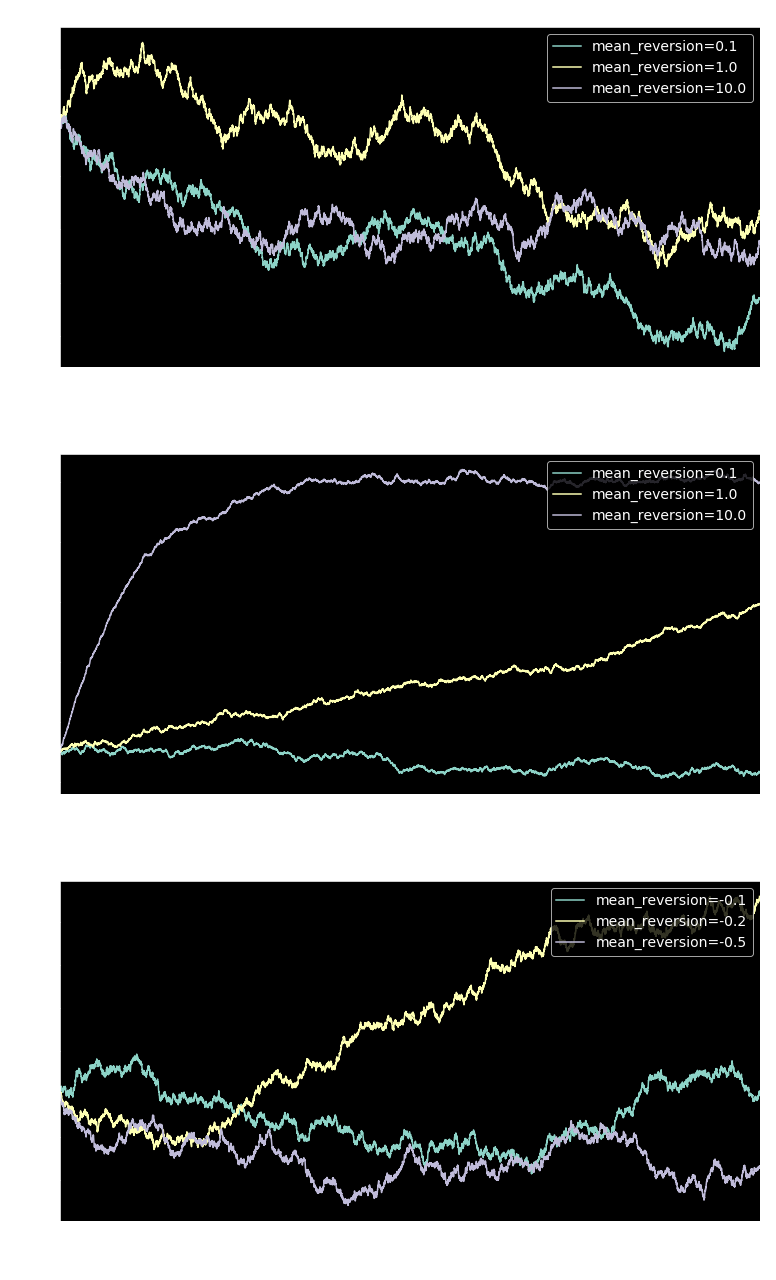

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=1)

mean_reversion_sets = [
    [0.1, 1.0, 10.0],
    [0.1, 1.0, 10.0],
    [-0.1, -0.2, -0.5]
]

long_terms = [0.0, 10.0, 0]

X = Vasicek(x0=1, T=1, scheme_steps=SCHEME_STEPS, vol=1)

for i, ax in enumerate(axes):
    long_term = long_terms[i]
    mean_reversions = mean_reversion_sets[i]
    for mean_reversion in mean_reversions:
        X.mean_reversion = mean_reversion
        X.long_term = long_term
        df = X.simulate()
        df.columns = ['mean_reversion={}'.format(mean_reversion)]
        df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\n')
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    ax.set_title('long_term={}'.format(long_term))
    
plt.tight_layout()
plt.show()

## CIR model

$dX_t = \lambda (\theta - X_t)dt + \sigma \sqrt{X_t} dW_t$

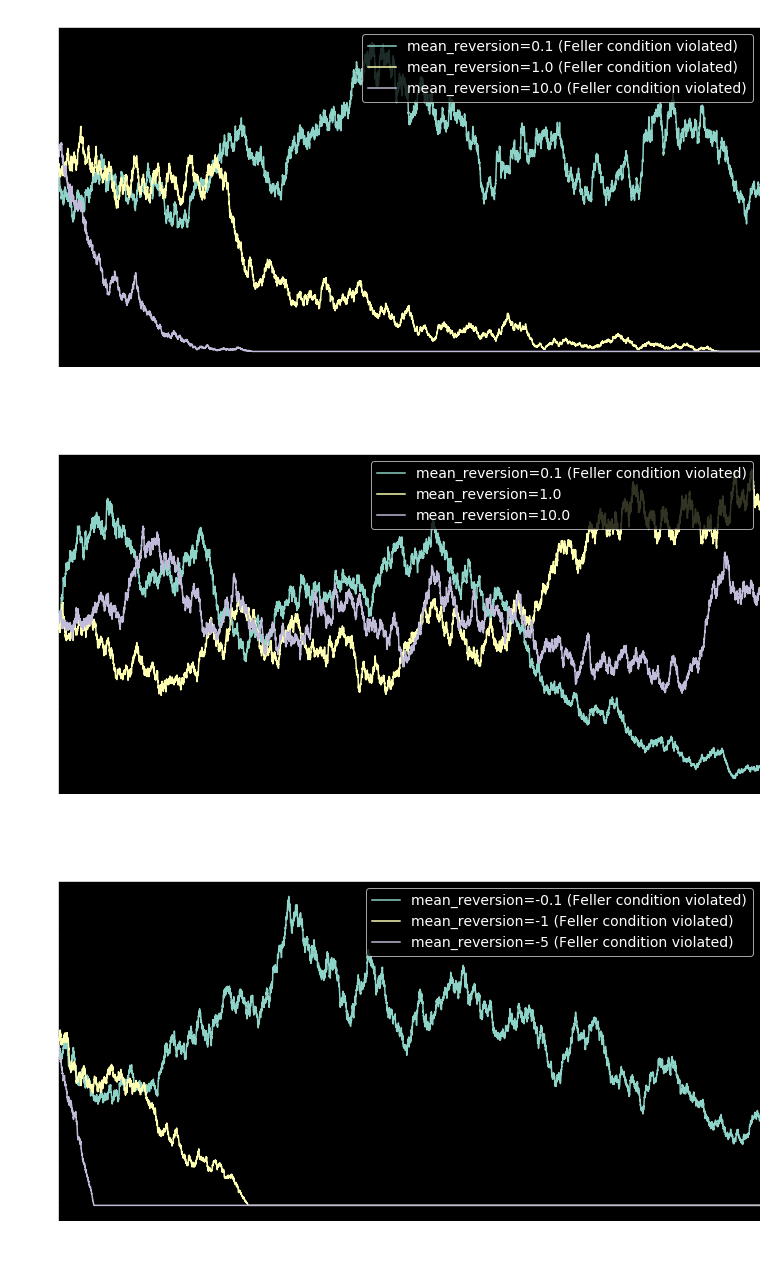

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1)

mean_reversion_sets = [
    [0.1, 1.0, 10.0],
    [0.1, 1.0, 10.0],
    [-0.1, -1, -5]
]

long_terms = [0.0, 1.0, 5.0]

# need to supply a boundary condition at zero in the case where
# the Feller condition is not met since it can then produce negative spot
# and thus imaginary square root volatility with nonzero probability
# inside the discretization scheme
X = CIR(x0=1, T=1, scheme_steps=SCHEME_STEPS, vol=1,\
            barrier=0, barrier_condition='absorb')
    
for i, ax in enumerate(axes):
    long_term = long_terms[i]
    mean_reversions = mean_reversion_sets[i]
    for mean_reversion in mean_reversions:
        X.mean_reversion = mean_reversion
        X.long_term = long_term
        df = X.simulate()
        label = 'mean_reversion={}'.format(mean_reversion)
        if not X.feller_condition:
            label += ' (Feller condition violated)'
        df.columns = [label]
        df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\n')
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    ax.set_title('long_term={}'.format(long_term))
    
plt.tight_layout()
plt.show()

## Black-Karasinski model

$d\log X_t = \lambda (\theta - \log X_t)dt + \sigma dW_t$

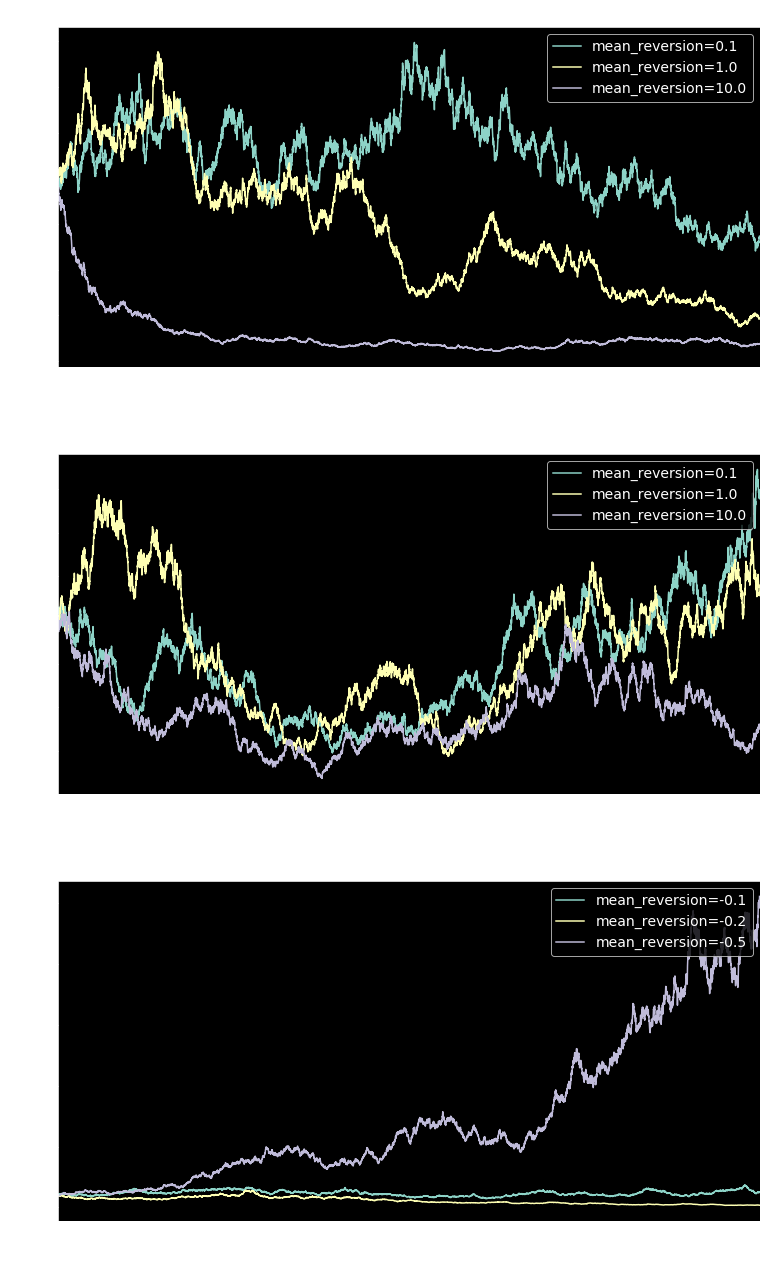

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=1)

mean_reversion_sets = [
    [0.1, 1.0, 10.0],
    [0.1, 1.0, 10.0],
    [-0.1, -0.2, -0.5]
]

long_terms = [0.1, 0.5, 1.0]

X = BlackKarasinski(x0=1, T=1, scheme_steps=SCHEME_STEPS, vol=1)

for i, ax in enumerate(axes):
    long_term = long_terms[i]
    mean_reversions = mean_reversion_sets[i]
    for mean_reversion in mean_reversions:
        X.mean_reversion = mean_reversion
        X.long_term = long_term
        df = X.simulate()
        df.columns = ['mean_reversion={}'.format(mean_reversion)]
        df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\n')
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    ax.set_title('long_term={}'.format(long_term))
    
plt.tight_layout()
plt.show()